<a href="https://colab.research.google.com/github/piaizv/Colaboratory/blob/main/guardar_codificaciones_y_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos

1. Importaciones

In [1]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

2. Dataset

In [2]:
d = {'marca': ['opel', 'opel', 'vw', 'vw', 'opel'],
     'modelo': ['corsa', 'astra', 'polo', 'polo', 'astra'],
     'cv': [90, 110, 90, 85, 136],
     'precio': [9000, 12000, 9500, 9400, 13000]}
data = pd.DataFrame(data=d)
data

,marca,modelo,cv,precio
0,opel,corsa,90,9000
1,opel,astra,110,12000
2,vw,polo,90,9500
3,vw,polo,85,9400
4,opel,astra,136,13000


3. Atributos

In [3]:
features = list(data)

target = 'precio'

numeric_features = data._get_numeric_data().columns.tolist()
categorical_features = list(set(features) - set(numeric_features))

numeric_features.remove(target)

all_features = numeric_features + categorical_features

In [4]:
print(features)
print(numeric_features)
print(categorical_features)
print(all_features)
print(target)

['marca', 'modelo', 'cv', 'precio']
['cv']
['marca', 'modelo']
['cv', 'marca', 'modelo']
precio


# LinearRegression y DictVectorizer (one hot encoding)

In [5]:
test_size=0.3
X_train1, X_test1 = train_test_split(data, test_size=test_size, random_state=1)
y_train1 = X_train1[target].values
y_test1 = X_test1[target].values

X_train1.drop([target], axis=1, inplace=True)
X_test1.drop([target], axis=1, inplace=True)

In [6]:
X_train1

,marca,modelo,cv
4,opel,astra,136
0,opel,corsa,90
3,vw,polo,85


In [7]:
X_test1

,marca,modelo,cv
2,vw,polo,90
1,opel,astra,110


Este paso es importante, puesto que hay atributos categóricos, y los atributos categóricos no se pueden utilizar para crear modelos, se opta por realizar la codificación 'one hot enconding'.

In [8]:
dv1 = DictVectorizer(sparse=False)

train_dict = X_train1.to_dict(orient='records')

dv1.fit(train_dict)

X_train1 = dv1.transform(train_dict)
X_test1 = dv1.transform(X_test1.to_dict(orient='records'))

In [9]:
X_train1

array([[136.,   1.,   0.,   1.,   0.,   0.],
       [ 90.,   1.,   0.,   0.,   1.,   0.],
       [ 85.,   0.,   1.,   0.,   0.,   1.]])

In [10]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

LinearRegression()

In [11]:
print(model1.score(X_train1, y_train1))
print(model1.score(X_test1, y_test1))
y_pred1 = model1.predict(X_test1)
display(y_pred1)
display(y_test1)

1.0
0.565444496864993


array([ 9808.41777085, 10876.22759158])

array([ 9500, 12000])

Ahora se procede a guardar el modelo, también es necesario guardar el diccionario de codificación utilizado, ya que para poder realizar una predicción de un coche será necesario convertirlo con el diccionario.

In [12]:
with open('modelo_regresion_lineal_one_hot_encoding.pck', 'wb') as f:
  pickle.dump((dv1, model1), f)

Se realiza la lectura del modelo y del diccionacio de codificación.

In [13]:
with open('modelo_regresion_lineal_one_hot_encoding.pck', 'rb') as f:
  dv1_read, model1_read = pickle.load(f)

Se obtiene un dato del dataset y con el diccionario de codificación y el modelo se obtiene su valoración.

In [14]:
registro = data.iloc[2]
print('registro original\n', registro)

x = dv1_read.transform(registro.to_dict())
print('registro transformado\n', x)

precio_real = registro['precio']
precio_predict = model1_read.predict(x)[0]

print('precio de venta real', precio_real)
print('precio de venta modelo', precio_predict)

registro original
 marca       vw
modelo    polo
cv          90
precio    9500
Name: 2, dtype: object
registro transformado
 [[90.  0.  1.  0.  0.  1.]]
precio de venta real 9500
precio de venta modelo 9808.41777084957


# LinearRegression y LabelEncoder

Otra técnica de codificación consiste en convertir directamente los valores categóricos en valores numéricos.

In [15]:
data2 = data.copy()

marca_encoder = LabelEncoder()
modelo_encoder = LabelEncoder()

#en un solo paso
data2['marca'] = marca_encoder.fit_transform(data2['marca'])

#en dos pasos
modelo_encoder.fit(data2['modelo'])
data2['modelo'] = modelo_encoder.transform(data2['modelo'])

display(data)
display(data2)

,marca,modelo,cv,precio
0,opel,corsa,90,9000
1,opel,astra,110,12000
2,vw,polo,90,9500
3,vw,polo,85,9400
4,opel,astra,136,13000


,marca,modelo,cv,precio
0,0,1,90,9000
1,0,0,110,12000
2,1,2,90,9500
3,1,2,85,9400
4,0,0,136,13000


In [16]:
test_size=0.3
X_train2, X_test2 = train_test_split(data2, test_size=test_size, random_state=1)
y_train2 = X_train2[target].values
y_test2 = X_test2[target].values
X_train2.drop([target], axis=1, inplace=True)
X_test2.drop([target], axis=1, inplace=True)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

print(model2.score(X_train2, y_train2))
print(model2.score(X_test2, y_test2))
y_pred2 = model2.predict(X_test2)
print(y_pred2)
print(y_test2)

1.0
0.23905610807605937
[ 9879.72617167 10505.42390732]
[ 9500 12000]


Se guarda el modelo y los diccionario, se recuperan y se utilizan.

In [17]:
with open('modelo_regresion_lineal_label_encoder.pck', 'wb') as f:
  pickle.dump((marca_encoder, modelo_encoder, model2), f)

with open('modelo_regresion_lineal_label_encoder.pck', 'rb') as f:
  marca_encoder_read, modelo_encoder_read, model2_read = pickle.load(f)

registro = data.iloc[2]
print('registro original\n', registro)

dataframe = pd.DataFrame.from_dict([registro.to_dict()])
dataframe['modelo'] = modelo_encoder_read.transform(dataframe['modelo'])
dataframe['marca'] = marca_encoder_read.transform(dataframe['marca'])
dataframe.drop([target], axis=1, inplace=True)
print('registro transformado\n', dataframe)

precio_real = registro['precio']
precio_predict = model2_read.predict(dataframe)

print('precio de venta real', precio_real)
print('precio de venta modelo', precio_predict[0])

registro original
 marca       vw
modelo    polo
cv          90
precio    9500
Name: 2, dtype: object
registro transformado
    marca  modelo  cv
0      1       2  90
precio de venta real 9500
precio de venta modelo 9879.726171669301


# RandomForestRegressor y DictVectorizer

In [ ]:
param_dist = {
    'n_estimators': [32, 64, 128],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [8, 4, 2],
    'bootstrap': [True, False]
}

regressor = RandomForestRegressor()

grid = GridSearchCV(estimator = regressor, param_grid = param_dist, cv = 3)
grid.fit(X_train1, y_train1)
model3 = grid.best_estimator_
model3.fit(X_train1, y_train1)

In [19]:
y_pred3 = model3.predict(X_test1)
print(model3.score(X_train1, y_train1))
print(model3.score(X_test1, y_test1))
print(y_pred3)
print(y_test1)

0.7839757898351648
0.6102000000000001
[ 9750. 10925.]
[ 9500 12000]


In [20]:
with open('random_forest_regressor_dict_vectorizer.pck', 'wb') as f:
  pickle.dump((model3), f)

with open('random_forest_regressor_dict_vectorizer.pck', 'rb') as f:
  model3_read = pickle.load(f)

registro = data.iloc[2]
x = dv1_read.transform(registro.to_dict())

print('registro original\n', registro)
print('registro transformado\n', x)

precio_real = registro['precio']
precio_predict = model3_read.predict(x)[0]

print('precio de venta real', precio_real)
print('precio de venta modelo', precio_predict)

registro original
 marca       vw
modelo    polo
cv          90
precio    9500
Name: 2, dtype: object
registro transformado
 [[90.  0.  1.  0.  0.  1.]]
precio de venta real 9500
precio de venta modelo 9750.0


# RandomForestRegressor y LabelEncoder

In [ ]:
param_dist = {
    'n_estimators': [32, 64, 128],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [8, 4, 2],
    'bootstrap': [True, False]
}

regressor = RandomForestRegressor()

grid = GridSearchCV(estimator = regressor, param_grid = param_dist, cv = 3)
grid.fit(X_train2, y_train2)
model4 = grid.best_estimator_
model4.fit(X_train2, y_train2)

In [22]:
y_pred4 = model4.predict(X_test2)
print(model4.score(X_train2, y_train2))
print(model4.score(X_test2, y_test2))
print(y_pred4)
print(y_test2)

0.8712708190247253
0.67935
[ 9225.  11037.5]
[ 9500 12000]


In [23]:
with open('random_forest_regressor_label_encoder.pck', 'wb') as f:
  pickle.dump((model4), f)

with open('random_forest_regressor_label_encoder.pck', 'rb') as f:
  model4_read = pickle.load(f)

registro = data.iloc[2]

dataframe = pd.DataFrame.from_dict([registro.to_dict()])
dataframe['modelo'] = modelo_encoder_read.transform(dataframe['modelo'])
dataframe['marca'] = marca_encoder_read.transform(dataframe['marca'])
dataframe.drop([target], axis=1, inplace=True)
#del dataframe[target]

print('registro original\n', registro)
print('registro transformado\n', dataframe)

precio_real = registro['precio']
precio_predict = model4_read.predict(dataframe)[0]

print('precio de venta real', precio_real)
print('precio de venta modelo', precio_predict)

registro original
 marca       vw
modelo    polo
cv          90
precio    9500
Name: 2, dtype: object
registro transformado
    marca  modelo  cv
0      1       2  90
precio de venta real 9500
precio de venta modelo 9225.0


# TensorFlow, Keras y DictVectorizer

In [24]:
from keras.layers import Dense
import keras
from keras.models import Sequential
import tensorflow as tf

In [25]:
# obtener la dimensión del dataset
X_train1.shape

(3, 6)

In [26]:
#obtener la dimensión del dataset de entrenamiento
X_train2.shape

(3, 3)

In [27]:
model5 = keras.Sequential()
model5.add(Dense(6, activation = 'relu', input_dim = X_train1.shape[1]))
model5.add(Dense(12, activation = 'relu'))
model5.add(Dense(1))

model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [28]:
model5.compile(optimizer = 'adam',
                  loss = 'mse',
                  metrics = ['mae', 'mse', 'accuracy'])

In [ ]:
history5 = model5.fit(X_train1, y_train1, epochs = 4000)

In [30]:
y_pred5 = model5.predict(X_test1)
print(model5.evaluate(X_train1, y_train1))
print(model5.evaluate(X_test1, y_test1))
print(y_pred5)
print(y_test1)

1/1 [==============================] - 0s 263ms/step - loss: 201553.4844 - mae: 360.5602 - mse: 201553.4844 - accuracy: 0.0000e+00
[201553.484375, 360.5602111816406, 201553.484375, 0.0]
1/1 [==============================] - 0s 32ms/step - loss: 656120.0625 - mae: 689.3306 - mse: 656120.0625 - accuracy: 0.0000e+00
[656120.0625, 689.33056640625, 656120.0625, 0.0]
[[ 9236.044]
 [10885.295]]
[ 9500 12000]


In [31]:
coche = {
    'marca': 'opel',
    'modelo': 'astra',
    'cv': 150,
}
dataframe = pd.DataFrame.from_dict([coche])

data_transform = dv1_read.transform(dataframe.to_dict(orient = 'records'))
precio_predict = model5.predict(data_transform)

print(precio_predict[0][0])

1/1 [==============================] - 0s 191ms/step
14790.33


In [32]:
model5.save('modelo_keras_one_hot_encoding.hdf5')
model5_read = tf.keras.models.load_model('modelo_keras_one_hot_encoding.hdf5')

registro = data.iloc[2]
x = dv1_read.transform(registro.to_dict())

print('registro original\n', registro)
print('registro transformado\n', x)

precio_real = registro['precio']
precio_predict = model5_read.predict(x)[0]

print('precio de venta real', precio_real)
print('precio de venta modelo', precio_predict[0])

registro original
 marca       vw
modelo    polo
cv          90
precio    9500
Name: 2, dtype: object
registro transformado
 [[90.  0.  1.  0.  0.  1.]]
1/1 [==============================] - 0s 79ms/step
precio de venta real 9500
precio de venta modelo 9236.044


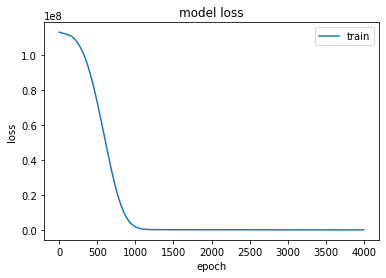

In [33]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history5.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# TensorFlow, Keras y LabelEncoder

In [ ]:
model6 = keras.Sequential()
model6.add(Dense(6, activation= 'relu', input_dim = X_train2.shape[1]))
model6.add(Dense(12, activation= 'relu'))
model6.add(Dense(1))
model6.summary()

model6.compile(optimizer = 'adam',
                  loss = 'mse',
                  metrics = ['mae', 'mse'])

history6 = model6.fit(X_train2, y_train2, epochs = 4000)

In [35]:
y_pred6 = model6.predict(X_test2)
print(model6.evaluate(X_train2, y_train2))
print(model6.evaluate(X_test2, y_test2))
print(y_pred6)
print(y_test2)

1/1 [==============================] - 0s 243ms/step - loss: 116899.6797 - mae: 279.2061 - mse: 116899.6797
[116899.6796875, 279.2060546875, 116899.6796875]
1/1 [==============================] - 0s 41ms/step - loss: 736224.8125 - mae: 661.6738 - mse: 736224.8125
[736224.8125, 661.673828125, 736224.8125]
[[ 9384.597]
 [10792.055]]
[ 9500 12000]


In [36]:
# predicción a partir de un diccionario
coche = {
    'marca': 'opel',
    'modelo': 'astra',
    'cv': 150,
}

dataframe = pd.DataFrame.from_dict([coche])
dataframe['modelo'] = modelo_encoder_read.transform(dataframe['modelo'])
dataframe['marca'] = marca_encoder_read.transform(dataframe['marca'])

precio_predict = model6.predict(dataframe)

print(precio_predict[0][0])

1/1 [==============================] - 0s 26ms/step
14674.315


In [37]:
model6.save('modelo_keras_label_encoding.hdf5')
model6_read = tf.keras.models.load_model('modelo_keras_label_encoding.hdf5')

registro = data.iloc[2]

dataframe = pd.DataFrame.from_dict([registro.to_dict()])
dataframe['modelo'] = modelo_encoder_read.transform(dataframe['modelo'])
dataframe['marca'] = marca_encoder_read.transform(dataframe['marca'])
dataframe.drop([target], axis=1, inplace=True)

print('registro original\n', registro)
print('registro transformado\n', dataframe)

precio_real = registro['precio']
precio_predict = model6_read.predict(dataframe)[0]

print('precio de venta real', precio_real)
print('precio de venta modelo', precio_predict[0])

registro original
 marca       vw
modelo    polo
cv          90
precio    9500
Name: 2, dtype: object
registro transformado
    marca  modelo  cv
0      1       2  90
1/1 [==============================] - 0s 97ms/step
precio de venta real 9500
precio de venta modelo 9384.597


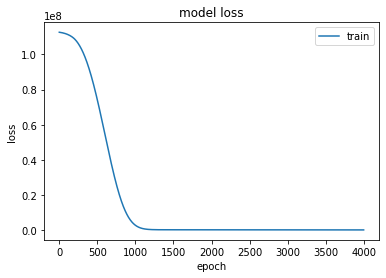

In [38]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history6.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()